In [3]:


%matplotlib inline



In [4]:


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))





import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import folium
import hvplot
import holoviews as hvp
import gpxpy
import movingpandas as mpd
print(mpd.__version__)
import branca.colormap as cm
from folium.plugins import HeatMap, HeatMapWithTime
import warnings
warnings.simplefilter("ignore")



In [5]:

!pip install geopandas
!pip install matplotlib
!pip install folium
!pip install hvplot
!pip install holoviews
!pip install gpxpy
!pip install movingpandas
!pip install branca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/co

In [6]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:


import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import folium
import hvplot
import holoviews as hvp
import gpxpy
import movingpandas as mpd
print(mpd.__version__)
import branca.colormap as cm
from folium.plugins import HeatMap, HeatMapWithTime
import warnings
warnings.simplefilter("ignore")



0.15.rc1


In [8]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
df1=open('20201021-183623.gpx','r')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [12]:
import gpxpy

In [13]:
import gpxpy

# Read GPX file using gpxpy.parse() method
with open('20201021-183623.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Create pandas DataFrame from GPX data
data = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            data.append([point.latitude, point.longitude, point.time])
df = pd.DataFrame(data, columns=['lat', 'lon', 'time'])


In [14]:


data = gpx.tracks[0].segments[0].points



In [15]:


## Start Position
start = data[0]
## End Position
finish = data[-1]



In [16]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time','speed'])
for point in data:
    df=df.append({'lon':point.longitude,'lat':point.latitude,'alt':point.elevation,'time':point.time,'speed':point.speed},ignore_index=True)

In [17]:


df.head()



,lon,lat,alt,time,speed
0,28.062550,-26.022658,1434.753,2020-10-21 16:36:23+00:00,1.15
1,28.062540,-26.022656,1435.579,2020-10-21 16:36:24+00:00,0.93
2,28.062524,-26.022653,1435.531,2020-10-21 16:36:25+00:00,1.70
3,28.062507,-26.022651,1434.636,2020-10-21 16:36:26+00:00,1.52
4,28.062491,-26.022649,1434.525,2020-10-21 16:36:27+00:00,1.52


In [18]:
#movingpandas expects a trajectory id and time column as index ,so we need to create both of them.In below example we only have one trajectory for my trip from home to grocery store so let's put a unique ID column
df = df.set_index('time').tz_localize(None)
df['traj_id'] = 1
df.head()

,lon,lat,alt,speed,traj_id
time,,,,,
2020-10-21 16:36:23,28.062550,-26.022658,1434.753,1.15,1
2020-10-21 16:36:24,28.062540,-26.022656,1435.579,0.93,1
2020-10-21 16:36:25,28.062524,-26.022653,1435.531,1.70,1
2020-10-21 16:36:26,28.062507,-26.022651,1434.636,1.52,1
2020-10-21 16:36:27,28.062491,-26.022649,1434.525,1.52,1


In [19]:


df.head()
print('finished reading {}'.format(len(df)))



finished reading 1286


<AxesSubplot:xlabel='time'>

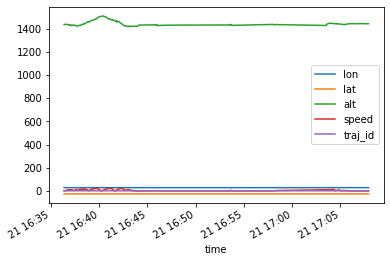

In [20]:
df.plot()

In [21]:
#Above plot does not reflect underneath geometrical aspect so, lets create geometrical dataframe using geopandas
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['lon'],df['lat']),crs='epsg:4326')
gdf.head()

,lon,lat,alt,speed,traj_id,geometry
time,,,,,,
2020-10-21 16:36:23,28.062550,-26.022658,1434.753,1.15,1,POINT (28.06255 -26.02266)
2020-10-21 16:36:24,28.062540,-26.022656,1435.579,0.93,1,POINT (28.06254 -26.02266)
2020-10-21 16:36:25,28.062524,-26.022653,1435.531,1.70,1,POINT (28.06252 -26.02265)
2020-10-21 16:36:26,28.062507,-26.022651,1434.636,1.52,1,POINT (28.06251 -26.02265)
2020-10-21 16:36:27,28.062491,-26.022649,1434.525,1.52,1,POINT (28.06249 -26.02265)


<AxesSubplot:>

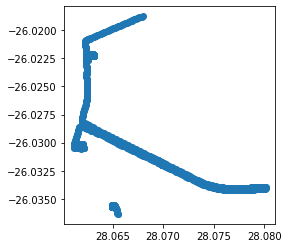

In [22]:


gdf.plot()



In [23]:


#check CRS of geo dataframe
gdf.crs



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
traj_collection = mpd.TrajectoryCollection(gdf, 'traj_id')

<AxesSubplot:>

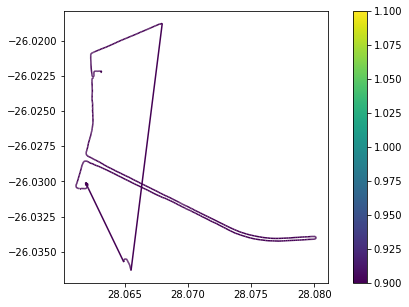

In [25]:


traj_collection.plot(column='traj_id', legend=True, figsize=(9,5))



In [ ]:
xplot=traj_collection.hvplot(c='speed',hover_cols=[speed],width=700, height=400, line_width=7.0, tiles='ESRI', cmap='Viridis', colorbar=True, clim=(0,20))

hvplot.save(xplot,'movement_data_viz_using_hvplot.html')



NameError: ignored

In [ ]:


start_point=traj_collection.get_start_locations()
end_point=traj_collection.get_end_locations()
start_point['Location_name'] = 'Mobile Generator Warehouse'
end_point['Location_name'] = 'Mobile Generator Warehouse Extension'
end_point['Location_name']



2020-10-21 17:07:55    Mobile Generator Warehouse Extension
Name: Location_name, dtype: object

In [ ]:


place_marks = read_file('20201021-183623.gpx')
place_marks.head()



,ele,time,magvar,geoidheight,name,cmt,desc,src,url,urlname,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,geometry
0,1426.791,2020-10-21 16:46:06+00:00,NaN,NaN,Network site 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,POINT (28.06191 -26.03011)
1,1435.686,2020-10-21 16:57:41+00:00,NaN,NaN,Network site 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,POINT (28.06492 -26.03572)
2,1442.441,2020-10-21 17:07:01+00:00,NaN,NaN,Network site 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,POINT (28.06313 -26.02224)


In [ ]:
xyz= place_marks.hvplot(c='name',hover_cols=['name'],width=150, height=100, line_width=7.0, tiles='StamenTonerBackground', cmap='Viridis', colorbar=True, clim=(0,20

SyntaxError: ignored